In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import pdb
import copy
from scipy import sparse
import anndata
import swan_vis as swan


p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [25]:
# load expression data and metadata into swan
annot = 'v29_cerberus.gtf'
ab = 'cerberus_filtered_abundance.tsv'
gene_ab = '/Users/fairliereese/mortazavi_lab/data/rnawg/lr_bulk/talon/human_talon_abundance.tsv'
gtf = 'cerberus.gtf'

In [28]:
sg = swan.SwanGraph()
sg.add_annotation(annot)
sg.add_transcriptome(gtf, include_isms=True)
sg.save_graph('swan_no_ab')


Adding annotation to the SwanGraph

Adding transcriptome to the SwanGraph
Saving graph as swan_no_ab.p


In [29]:
sg = swan.read('swan_no_ab.p')
sg.add_abundance(ab)

Read in graph from swan_no_ab.p

Adding abundance for datasets hl60_m2_24hr_1_1, mucosa_of_descending_colon_1_1, hl60_1_2, posterior_vena_cava_2_1, aorta_2_1... (and 133 more) to SwanGraph
Calculating TPM...
Calculating PI...


/Users/fairliereese/miniconda3/lib/python3.7/site-packages/swan_vis/utils.py:410: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)


Calculating edge usage...


/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Calculating TSS usage...
Using cerberus IDs to calculate


/Users/fairliereese/miniconda3/lib/python3.7/site-packages/swan_vis/utils.py:410: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)


Calculating TES usage...
Using cerberus IDs to calculate


/Users/fairliereese/miniconda3/lib/python3.7/site-packages/swan_vis/utils.py:410: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)


Calculating IC usage...
Using cerberus IDs to calculate


/Users/fairliereese/miniconda3/lib/python3.7/site-packages/swan_vis/utils.py:410: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)


In [30]:
sg.save_graph('swan')

Saving graph as swan.p


In [31]:
sg = swan.read('swan.p')
sg.add_abundance(gene_ab, how='gene')

Read in graph from swan.p

Adding abundance for datasets gm12878_1_1, gm12878_1_2, gm12878_1_3, gm12878_1_4, gm12878_3_1... (and 133 more) to SwanGraph
Calculating TPM...


In [32]:
sg.save_graph('swan')

Saving graph as swan.p


In [33]:
sg.t_df.novelty.unique()

array(['Undefined', 'Known', 'NIC', 'ISM', 'NNC'], dtype=object)

In [34]:
temp = sg.t_df[['novelty', 'tid']]
temp.reset_index(drop=True, inplace=True)
temp[['novelty', 'tid']].groupby('novelty').count()

,tid
novelty,
ISM,27635
Known,262367
NIC,48526
NNC,14539
Undefined,1282


In [37]:
sg.t_df.loc[sg.t_df.novelty == 'Undefined']

,tname,gid,gname,path,tid,tss_id,ic_id,tes_id,loc_path,annotation,novelty
tid,,,,,,,,,,,
"ENCODEHG000058784[1,1,2]","ENCODEHG000058784[1,1,2]",ENCODEHG000058784,ENCODEHG000058784,"[869635, 869617, 869636, 869621, 869637]","ENCODEHG000058784[1,1,2]",ENCODEHG000058784_1,ENCODEHG000058784_1,ENCODEHG000058784_2,"[43, 41, 40, 37, 36, 34]",False,Undefined
"ENCODEHG000058784[2,2,2]","ENCODEHG000058784[2,2,2]",ENCODEHG000058784,ENCODEHG000058784,"[869638, 869639, 869616, 869617, 869618, 86961...","ENCODEHG000058784[2,2,2]",ENCODEHG000058784_2,ENCODEHG000058784_2,ENCODEHG000058784_2,"[46, 44, 42, 41, 40, 39, 38, 37, 36, 34]",False,Undefined
"ENCODEHG000058784[2,3,1]","ENCODEHG000058784[2,3,1]",ENCODEHG000058784,ENCODEHG000058784,"[869614, 869615, 869616, 869617, 869618, 86961...","ENCODEHG000058784[2,3,1]",ENCODEHG000058784_2,ENCODEHG000058784_3,ENCODEHG000058784_1,"[46, 45, 42, 41, 40, 39, 38, 37, 36, 35, 33, 3...",False,Undefined
"ENCODEHG000058837[1,1,1]","ENCODEHG000058837[1,1,1]",ENCODEHG000058837,ENCODEHG000058837,"[869612, 869598, 869599, 869600, 869613, 86960...","ENCODEHG000058837[1,1,1]",ENCODEHG000058837_1,ENCODEHG000058837_1,ENCODEHG000058837_1,"[11, 9, 8, 6, 5, 2, 1, 0]",False,Undefined
"ENCODEHG000058837[2,2,1]","ENCODEHG000058837[2,2,1]",ENCODEHG000058837,ENCODEHG000058837,"[869606, 869607, 869597, 869598, 869599, 86960...","ENCODEHG000058837[2,2,1]",ENCODEHG000058837_2,ENCODEHG000058837_2,ENCODEHG000058837_1,"[17, 12, 10, 9, 8, 6, 5, 4, 3, 2, 1, 0]",False,Undefined
...,...,...,...,...,...,...,...,...,...,...,...
"ENCODEHG000570158[1,1,1]","ENCODEHG000570158[1,1,1]",ENCODEHG000570158,ENCODEHG000570158,"[928099, 928100, 928101]","ENCODEHG000570158[1,1,1]",ENCODEHG000570158_1,ENCODEHG000570158_1,ENCODEHG000570158_1,"[600964, 600962, 600957, 600956]",False,Undefined
"ENCODEHG000570465[1,1,1]","ENCODEHG000570465[1,1,1]",ENCODEHG000570465,ENCODEHG000570465,"[956853, 956854, 956855]","ENCODEHG000570465[1,1,1]",ENCODEHG000570465_1,ENCODEHG000570465_1,ENCODEHG000570465_1,"[898398, 898399, 898400, 898401]",False,Undefined
"ENCODEHG000573849[1,1,1]","ENCODEHG000573849[1,1,1]",ENCODEHG000573849,ENCODEHG000573849,"[947086, 947087, 947088, 947089, 947090, 94709...","ENCODEHG000573849[1,1,1]",ENCODEHG000573849_1,ENCODEHG000573849_1,ENCODEHG000573849_1,"[829227, 829228, 829229, 829230, 829231, 82923...",False,Undefined


In [35]:
sg.save_graph('swan')

Saving graph as swan.p


## Add metadata

In [36]:
sg = swan.read('swan.p')
meta = '../swan/swan_metadata.tsv'
sg.add_metadata(meta)

# colors
c_dict, order = get_biosample_colors()
sg.set_metadata_colors('sample', c_dict)

c_dict, order = get_ad_colors()
sg.set_metadata_colors('health_status', c_dict)

sg.save_graph('swan')

Read in graph from swan.p


/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:794: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


Saving graph as swan.p


## Swan reports

In [80]:
sg = swan.read('swan.p')
datasets = []
datasets += sg.adata.obs.loc[sg.adata.obs['sample'].str.contains('h9'), 'sample'].unique().tolist()
datasets += sg.adata.obs.loc[sg.adata.obs['sample'].str.contains('pgp1'), 'sample'].unique().tolist()
datasets.append('caco2')
print(datasets)

# sg.gen_report('MEF2C',
#               prefix='figures/mef2c_h9_pgp1_caco2',
#               layer='pi',
#               cmap='magma',
#               novelty=True,
#               groupby='sample',
#               transcript_col='tname',
#               metadata_cols=['sample'],
#               datasets={'sample': datasets},
#               browser=True)

sg.gen_report('MEF2C',
              prefix='figures/mef2c_h9_pgp1_caco2',
              layer='tpm',
              cmap='viridis',
              novelty=True,
              groupby='sample',
              transcript_col='tname',
              metadata_cols=['sample'],
              indicate_novel=True,
              datasets={'sample': datasets})


Read in graph from swan.p
['h9_chondro', 'h9_panc_beta', 'h9_de', 'h9_neural_crest', 'h9', 'h9_osteocyte', 'h9_panc_progen', 'pgp1_excite_neuron', 'pgp1_astro', 'pgp1', 'pgp1_endo', 'caco2']

Plotting transcripts for ENSG00000081189.15
Saving transcript path graph for ENSG00000081189[1,10,5] as figures/mef2c_h9_pgp1_caco2_novel_ENSG00000081189[1,10,5]_path.png
Saving transcript path graph for ENSG00000081189[1,13,8] as figures/mef2c_h9_pgp1_caco2_novel_ENSG00000081189[1,13,8]_path.png
Saving transcript path graph for ENSG00000081189[1,64,4] as figures/mef2c_h9_pgp1_caco2_novel_ENSG00000081189[1,64,4]_path.png
Saving transcript path graph for ENSG00000081189[1,62,4] as figures/mef2c_h9_pgp1_caco2_novel_ENSG00000081189[1,62,4]_path.png
Saving transcript path graph for ENSG00000081189[1,43,20] as figures/mef2c_h9_pgp1_caco2_novel_ENSG00000081189[1,43,20]_path.png
Saving transcript path graph for ENSG00000081189[1,64,5] as figures/mef2c_h9_pgp1_caco2_novel_ENSG00000081189[1,64,5]_path.png


In [2]:
# bin1
sg = swan.read('swan.p')

gene = 'BIN1'
opref = 'figures/{}'.format(gene)
conds = sg.adata.obs.loc[sg.adata.obs['sample'].str.contains('pgp1'), 'sample'].unique().tolist()
conds = ['pgp1', 'pgp1_astro', 'pgp1_endo', 'pgp1_excite_neuron']
sg.gen_report(gene,
          prefix=opref,
          layer='pi',
          order='pi',
          cmap='magma',
          novelty=True,
          metadata_cols=['sample'],
          groupby='sample',
          datasets={'sample': conds},
          transcript_col='tname',
          display_numbers=True,
          browser=True)

Read in graph from swan.p

Plotting transcripts for ENSG00000136717.14
Saving transcript path graph for ENSG00000136717[1,2,1] as figures/BIN1_browser_ENSG00000136717[1,2,1]_path.png
Saving transcript path graph for ENSG00000136717[2,2,1] as figures/BIN1_browser_ENSG00000136717[2,2,1]_path.png
Saving transcript path graph for ENSG00000136717[1,4,1] as figures/BIN1_browser_ENSG00000136717[1,4,1]_path.png
Saving transcript path graph for ENSG00000136717[2,1,1] as figures/BIN1_browser_ENSG00000136717[2,1,1]_path.png
Saving transcript path graph for ENSG00000136717[1,1,1] as figures/BIN1_browser_ENSG00000136717[1,1,1]_path.png
Saving transcript path graph for ENSG00000136717[1,20,1] as figures/BIN1_browser_ENSG00000136717[1,20,1]_path.png
Saving transcript path graph for ENSG00000136717[4,15,1] as figures/BIN1_browser_ENSG00000136717[4,15,1]_path.png
Saving transcript path graph for ENSG00000136717[1,18,1] as figures/BIN1_browser_ENSG00000136717[1,18,1]_path.png
Saving transcript path grap

### How many isoforms does it take to get 90% expression / gene / sample?

In [6]:
sg = swan.read('swan.p')
t_df = pd.read_csv(ab, sep='\t')

Read in graph from swan.p


In [7]:
t_df = t_df[['annot_gene_name', 'annot_transcript_id', 'annot_gene_id']]
t_df.rename({'annot_gene_name': 'gname',
             'annot_gene_id': 'gid',
             'annot_transcript_id': 'tid'}, 
             axis=1, 
             inplace=True)

df, _ = swan.calc_pi(sg.adata, sg.t_df, obs_col='sample')
df = df.sparse.to_dense()
df = df.transpose()
df = df.merge(t_df[['tid', 'gname', 'gid']], how='inner', on='tid')

df.set_index(['tid', 'gname', 'gid'], inplace=True)
df = df.melt(ignore_index=False, value_name='pi', var_name='sample')
df = df.dropna(subset=['pi'])
df.reset_index(inplace=True)

# determine the rank of each pi value for each sample / gene combo
df = df.sort_values(by='pi', ascending=False)
df['pi_rank'] = df.sort_values(by='pi', ascending=False).groupby(['gname', 'gid', 'sample']).cumcount()+1

# add a column that we can check for convergence with 
df['gname_gid_biosamp'] = df.gname+'_'+df.gid+'_'+df['sample']

iso_df = pd.DataFrame()
max_pi_rank = df.pi_rank.max()
for max_pi in range(1, max_pi_rank+1):
    pi_ranks = [i for i in range(1, max_pi+1)]
    # for the first iteration, we don't have to limit which genes we look at
    if max_pi == 1:
        temp = df.loc[df.pi_rank.isin(pi_ranks)].groupby(['gname_gid_biosamp']).sum().reset_index()
    else:
        ids = iso_df.gname_gid_biosamp.tolist()
        temp = df.loc[(~df.gname_gid_biosamp.isin(ids))&(df.pi_rank.isin(pi_ranks))].groupby(['gname_gid_biosamp']).sum().reset_index()
    
    # converged if no more entries to analyze
    if len(temp.index) == 0:
        break
    
    # get isoforms that have >90% isoform exp accounted for
    temp = temp.loc[temp.pi >= 90]
    temp.drop(['pi_rank'], axis=1, inplace=True)
    temp['n_isos'] = max_pi
    
    iso_df = pd.concat([iso_df, temp])

# get list of isoforms required for each sample / gene combination as well
df = df.merge(iso_df, how='left', on='gname_gid_biosamp')
df['in_90_set'] = df.pi_rank <= df.n_isos
df = df.loc[df.in_90_set]
df[['gname', 'gid', 'sample']] = df.gname_gid_biosamp.str.split('_', n=2, expand=True)    
df.rename({'pi_x': 'pi'}, axis=1, inplace=True)
df.drop(['gname_gid_biosamp', 
        'pi_y', 'n_isos', 'in_90_set'], axis=1, inplace=True)

# get the sample / gene vs. n isoforms required for 90%    
iso_df[['gname', 'gid', 'sample']] = iso_df.gname_gid_biosamp.str.split('_', n=2, expand=True)    
iso_df.drop('gname_gid_biosamp', axis=1, inplace=True)
iso_df = iso_df.sort_values('n_isos', ascending=False)

In [8]:
df.head()

,tid,gname,gid,sample,pi,pi_rank
0,"ENSG00000238009[4,5,5]",AL627309.1,ENSG00000238009.6,hl60_m2_24hr,100.0,1
1,"ENSG00000259335[1,1,1]",HNRNPMP1,ENSG00000259335.1,h9_de,100.0,1
2,"ENSG00000133111[1,1,1]",RFXAP,ENSG00000133111.3,heart,100.0,1
3,"ENSG00000227973[1,1,1]",PIN4P1,ENSG00000227973.1,h9_de,100.0,1
4,"ENSG00000230283[1,1,1]",RPS12P24,ENSG00000230283.1,heart,100.0,1


In [9]:
df.to_csv('isos_sample_gene_90.tsv', sep='\t', index=False)

## Which isoforms are the major isoform in any sample?

In [14]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import pdb
import copy
from scipy import sparse
import anndata
import swan_vis as swan


p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

# load expression data and metadata into swan
annot = 'v29_cerberus.gtf'
ab = 'cerberus_filtered_abundance.tsv'
gene_ab = '/Users/fairliereese/mortazavi_lab/data/rnawg/lr_bulk/talon/human_talon_abundance.tsv'
gtf = 'cerberus.gtf'

In [15]:
sg = swan.read('swan.p')

Read in graph from swan.p


In [16]:
# df = pd.read_csv(gene_ab, sep='\t')
# df, inds = get_tpm_table(df,
#                    how='gene',
#                    min_tpm=1,
#                    gene_subset='polya')

# # need stable gid
# df.head()
# df['temp_tid'] = df.index.tolist()
# inds = cerberus.get_stable_gid(df, col='temp_tid')
# inds[:5]

In [22]:
temp = pd.DataFrame()
temp['gids'] = inds
temp.to_csv('temp_gids_1_tpm.tsv', sep='\t', index=False)

In [68]:
inds = pd.read_csv('temp_gids_1_tpm.tsv', sep='\t')
# inds.head()
inds = inds.gids.tolist()
len(inds)

34027

In [69]:
def uses_principal_feat(x):
    """
    Agg function to determine if individual feats
    (tss, ic, tes) use the principal version of that 
    feature
    """
    return '1' in x.unique()

def uses_principal_iso(x):
    """
    Agg function to determine if the isoform triplet
    is the principal version of that gene
    """
    return '1,1,1' in x.unique()

def get_major_iso(sg, obs_col='sample', gene_subset=None):
    """
    Determine what the major isoform is in each grouping
    for each gene 
    
    Parameters:
        sg (swan_vis SwanGraph): SwanGraph with transcript
            abundance data added
        obs_col (str): Column in `sg.adata.obs` to group
            datasets by 
        gene_subset (list of str or None): If not None, 
            list of stable gene ids to subset on 
            
    Returns:
        df (pandas DataFrame): DF where each row is the major 
            isoform in each expressed gene / sample combination
    """
    df, _ = swan.calc_pi(sg.adata, sg.t_df, obs_col=obs_col)
    df = df.sparse.to_dense()
    df = df.transpose()

    t_df = sg.t_df.copy(deep=True)
    t_df.reset_index(drop=True, inplace=True)
    t_df = t_df[['tid', 'gname', 'gid']]
    df = df.merge(t_df, how='inner', on='tid')
    
    df.set_index(['tid', 'gname', 'gid'], inplace=True)
    df = df.melt(ignore_index=False, value_name='pi', var_name=obs_col)
    df = df.dropna(subset=['pi'])
    df.reset_index(inplace=True)
    
    # remove unexpressed isoforms
    df = df.loc[df.pi > 0]
    
    # limit to detected genes
    df['gid_stable'] = cerberus.get_stable_gid(df, 'gid')
    if gene_subset:
        df = df.loc[df.gid_stable.isin(gene_subset)]
        
    # sort by gene, sample, and pi value
    # dedupe across the gene and sample cols; take the top-expressed isoform
    df = df.sort_values(by=['gid', obs_col, 'pi'],
                        ascending=[False, False, False])

    df = df.drop_duplicates(subset=['gname', 'gid', obs_col], keep='first')       
    
    return df

def get_major_principal_feats(sg, **kwargs):
    """
    Determine how many genes have at least one sample where
    the features and full-length isoform is the principal isoform
    
    Parameters:
        sg (swan_vis SwanGraph): SwanGraph with transcript
                    abundance data added   
                    
    Returns:
        df (pandas DataFrame): DF w/ boolean columns for 
            whether or not there's at least one sample
            where the major feat / isoform is the principal one
    """
    df = get_major_iso(sg, **kwargs)
    
    # add features
    for feat in ['ic', 'tss', 'tes']:
        df = add_feat(df, kind=feat,
                      col='tid',
                      as_number=True,
                      drop_triplet=False)

    # remove unnecessary columns and determine which genes
    # have at least one sample who's major iso uses the principal
    # of each feature
    temp = df.copy(deep=True)
    temp.drop([obs_col, 'tid', 'pi', 'gid'], axis=1, inplace=True)

    temp = temp.groupby(['gname',
                         'gid_stable']).agg({'tss': uses_principal_feat,
                                             'ic': uses_principal_feat,
                                             'tes': uses_principal_feat,
                                             'triplet': uses_principal_iso}).reset_index()

    # output
    for feat in ['ic', 'tss', 'tes', 'triplet']:
        n_genes = len(temp.gid_stable.unique().tolist())
        n_major = len(temp.loc[temp[feat] == True].index)
        print(n_genes)
        print(n_major)
        print(feat)
        print('{:.2f}% of genes have >=1 sample where major isoform contains principal {}'.format((n_major/n_genes)*100, feat))
        print()
        
    return temp

In [70]:
df = get_major_iso(sg, 'sample', gene_subset=inds)

In [152]:
# # add features
# for feat in ['ic', 'tss', 'tes']:
#     df = add_feat(df, kind=feat,
#                   col='tid',
#                   as_number=True,
#                   drop_triplet=False)

# temp = df.copy(deep=True)
# temp.drop([obs_col, 'tid', 'pi', 'gid'], axis=1, inplace=True)

# temp = temp.groupby(['gname',
#                      'gid_stable']).agg({'tss': uses_principal_feat,
#                                          'ic': uses_principal_feat,
#                                          'tes': uses_principal_feat,
#                                          'triplet': uses_principal_iso}).reset_index()


# for feat in ['ic', 'tss', 'tes', 'triplet']:
#     n_genes = len(temp.gid_stable.unique().tolist())
#     n_major = len(temp.loc[temp[feat] == True].index)
#     print(n_genes)
#     print(n_major)
#     print(feat)
#     print('{:.2f}% of genes have >=1 sample where major isoform contains principal {}'.format((n_major/n_genes)*100, feat))
#     print()

In [ ]:
df = get_major_iso(sg, 'sample', gene_subset=inds)

In [75]:
obs_col = 'sample'

In [72]:
# add features
for feat in ['ic', 'tss', 'tes']:
    df = add_feat(df, kind=feat,
                  col='tid',
                  as_number=True,
                  drop_triplet=False)


In [117]:
temp = df.copy(deep=True)
temp.drop(['tid', 'pi', 'gid'], axis=1, inplace=True)

temp = temp.groupby([obs_col, 'gname',
                     'gid_stable'],
                     observed=True).agg({'tss': uses_principal_feat,
                                         'ic': uses_principal_feat,
                                         'tes': uses_principal_feat,
                                         'triplet': uses_principal_iso}).reset_index()

In [118]:
temp.head()

,sample,gname,gid_stable,tss,ic,tes,triplet
0,a673,A1BG,ENSG00000121410,False,False,False,False
1,a673,A1BG-AS1,ENSG00000268895,True,False,True,False
2,a673,A2M,ENSG00000175899,True,False,True,False
3,a673,A2ML1,ENSG00000166535,False,False,False,False
4,a673,A4GALT,ENSG00000128274,True,True,True,True


In [119]:
for feat in ['tss', 'ic', 'tes', 'triplet']:
    col = 'not_{}'.format(feat)
    temp[feat] = temp[feat].astype(int)
    temp[col] = (temp[feat] == False).astype(int)

In [86]:
# temp.triplet = temp.triplet.astype(int)

In [88]:
# temp['major_iso'] = temp.triplet

In [122]:
# temp.head()

In [96]:
# temp = temp[['gname', 'gid_stable', 'major_iso']]
# temp['not_major_iso'] = (temp.major_iso == False).astype(int)


In [121]:
temp.head()

,sample,gname,gid_stable,tss,ic,tes,triplet,not_tss,not_ic,not_tes,not_triplet
0,a673,A1BG,ENSG00000121410,0,0,0,0,1,1,1,1
1,a673,A1BG-AS1,ENSG00000268895,1,0,1,0,0,1,0,1
2,a673,A2M,ENSG00000175899,1,0,1,0,0,1,0,1
3,a673,A2ML1,ENSG00000166535,0,0,0,0,1,1,1,1
4,a673,A4GALT,ENSG00000128274,1,1,1,1,0,0,0,0


In [124]:
temp = temp.groupby(['gname', 'gid_stable']).sum().reset_index()

In [125]:
temp.head()

,gname,gid_stable,tss,ic,tes,triplet,not_tss,not_ic,not_tes,not_triplet
0,A1BG,ENSG00000121410,2,2,24,0,42,42,20,44
1,A1BG-AS1,ENSG00000268895,43,2,18,2,0,41,25,41
2,A1CF,ENSG00000148584,10,0,1,0,0,10,9,10
3,A2M,ENSG00000175899,25,31,32,24,7,1,0,8
4,A2M-AS1,ENSG00000245105,13,1,13,1,0,12,0,12


In [99]:
# temp.rename({'major_iso': 'n_{}_major_iso'.format(obs_col), 
#              'not_major_iso': 'n_{}_not_major_iso'.format(obs_col)},
#             axis=1, inplace=True)

In [126]:
temp['n_samples'] = temp.triplet+temp.not_triplet

In [130]:
for feat in ['triplet', 'tss', 'ic', 'tes']:
    col = 'not_{}'.format(feat)
    n_genes = len(temp.gid_stable.unique())
    n_num = len(temp.loc[temp[col] >= 1].index)
    print()
    print('{:.2f}% ({}/{}) genes with >= 1 sample where the major {} is not the principal one'.format((n_num/n_genes)*100, n_num, n_genes, feat)) 


69.00% (18355/26603) genes with >= 1 sample where the major triplet is not the principal one

44.49% (11835/26603) genes with >= 1 sample where the major tss is not the principal one

54.96% (14622/26603) genes with >= 1 sample where the major ic is not the principal one

51.78% (13774/26603) genes with >= 1 sample where the major tes is not the principal one


In [131]:
# do we have the correct number of samples? Should be 50
max(temp.tss)

50

In [110]:
temp.head()

,gname,gid_stable,n_sample_major_iso,n_sample_not_major_iso,n_expressed_samples
0,A1BG,ENSG00000121410,0,44,44
1,A1BG-AS1,ENSG00000268895,2,41,43
2,A1CF,ENSG00000148584,0,10,10
3,A2M,ENSG00000175899,24,8,32
4,A2M-AS1,ENSG00000245105,1,12,13


In [137]:
for feat in ['triplet', 'tss', 'ic', 'tes']:
    col = 'perc_{}'.format(feat)
    temp[col] = (temp[feat]/temp.n_samples)*100

In [138]:
temp.head()

,gname,gid_stable,tss,ic,tes,triplet,not_tss,not_ic,not_tes,not_triplet,n_samples,prop_triplet,prop_tss,prop_ic,prop_tes,perc_triplet,perc_tss,perc_ic,perc_tes
0,A1BG,ENSG00000121410,2,2,24,0,42,42,20,44,44,0.000000,0.045455,0.045455,0.545455,0.000000,4.545455,4.545455,54.545455
1,A1BG-AS1,ENSG00000268895,43,2,18,2,0,41,25,41,43,0.046512,1.000000,0.046512,0.418605,4.651163,100.000000,4.651163,41.860465
2,A1CF,ENSG00000148584,10,0,1,0,0,10,9,10,10,0.000000,1.000000,0.000000,0.100000,0.000000,100.000000,0.000000,10.000000
3,A2M,ENSG00000175899,25,31,32,24,7,1,0,8,32,0.750000,0.781250,0.968750,1.000000,75.000000,78.125000,96.875000,100.000000
4,A2M-AS1,ENSG00000245105,13,1,13,1,0,12,0,12,13,0.076923,1.000000,0.076923,1.000000,7.692308,100.000000,7.692308,100.000000


In [142]:
def get_feat_colors(cats=None):
    tss = '#56B4E9'
    tes = '#E69F00'
    splicing = '#CC79A7'
    triplet = '#009E73'
    c_dict = {'tss': tss,
              'ic': splicing,
              'tes': tes,
              'triplet': triplet}
    order = ['triplet', 'tss', 'ic', 'tes']
    
    c_dict, order = rm_color_cats(c_dict, order, cats)
    return c_dict, order


In [143]:
c_dict, order = get_feat_colors()

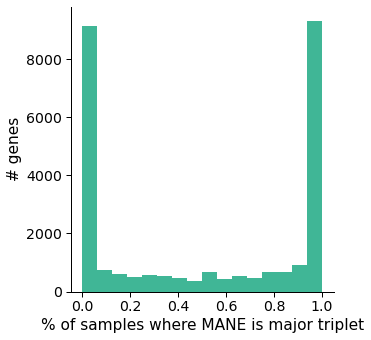

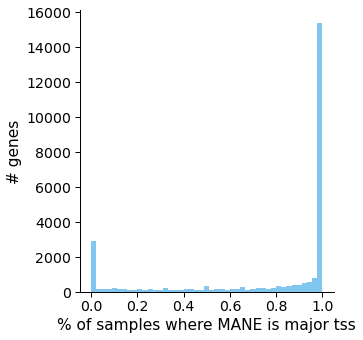

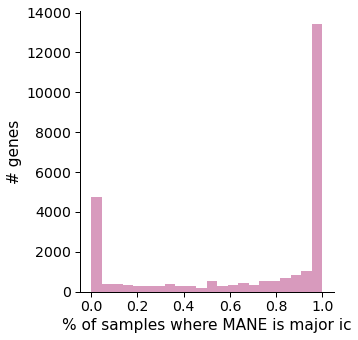

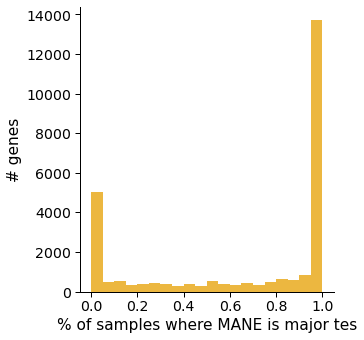

In [151]:
for feat in ['triplet', 'tss', 'ic', 'tes']:
    col = 'prop_{}'.format(feat)
    ax = sns.displot(data=temp,
                     x=col,
                     linewidth=0, 
                     color=c_dict[feat])
    ylabel = '# genes'
    xlabel = '% of samples where MANE is major {}'.format(feat)
    ax.set(ylabel=ylabel, xlabel=xlabel)
    
    fname = 'figures/MANE_vs_major_{}_hist.png'.format(feat)
    plt.savefig(fname, dpi=800, bbox_inches='tight')

In [116]:
gnames = ['MEF2C', 'COL1A1']
temp.loc[temp.gname.isin(gnames)]

,gname,gid_stable,n_sample_major_iso,n_sample_not_major_iso,n_expressed_samples,prop_major_samples
8842,COL1A1,ENSG00000108821,0,29,29,0.0
16140,MEF2C,ENSG00000081189,0,42,42,0.0
